## Import Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("winequality-red.csv", sep=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.duplicated().sum() #Checking for duplicated rows


240

In [4]:
data["quality"].value_counts()
data.drop_duplicates(inplace = True)#Remove any duplicates
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1].to_numpy()
y = data.iloc[:, -1].to_numpy()

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=12)

## Build Model

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()
params = {"C": np.linspace(0.05, 1.5, 30),
            "kernel": ['linear', 'poly', 'rbf', 'sigmoid'], 
            "degree": range(1, 11)}

# search = GridSearchCV(model, params)
# search.fit(X_train, y_train)

## Plots

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

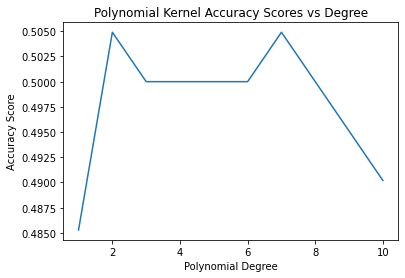

In [8]:
acc = []

for d in params["degree"]:
    y_pred = SVC(kernel="poly", degree=d).fit(X_train, y_train).predict(X_val)
    
    acc.append(accuracy_score(y_val, y_pred))

plt.plot(params["degree"], acc)
plt.xlabel("Polynomial Degree")
plt.ylabel("Accuracy Score")
plt.title("Polynomial Kernel Accuracy Scores vs Degree")
plt.show()

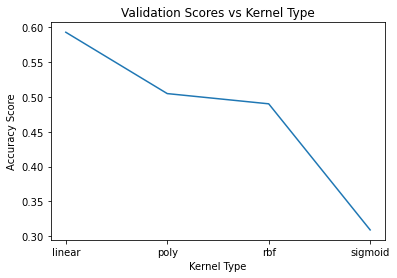

In [11]:
acc = []

for kernel in params["kernel"]:
    y_pred = SVC(kernel=kernel, degree=2).fit(X_train, y_train).predict(X_val)
    
    acc.append(accuracy_score(y_val, y_pred))

plt.plot(params["kernel"], acc)
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy Score")
plt.title("Validation Scores vs Kernel Type")
plt.show()

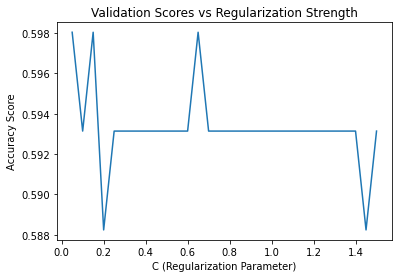

In [12]:
acc = []

for c in params["C"]:
    y_pred = SVC(C=c, kernel="linear").fit(X_train, y_train).predict(X_val)
    
    acc.append(accuracy_score(y_val, y_pred))

plt.plot(params["C"], acc)
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Accuracy Score")
plt.title("Validation Scores vs Regularization Strength")
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = SVC(C=0.65, kernel="linear")
model.fit(X_train_val, y_train_val)
y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.5911764705882353

<AxesSubplot:>

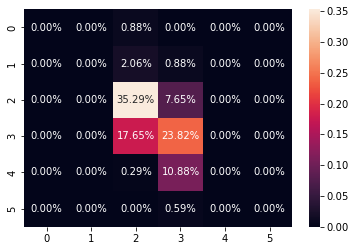

In [21]:
cfm = confusion_matrix(y_test, y_pred, labels=range(3, 9))

sns.heatmap(cfm/np.sum(cfm), annot=True, fmt=".2%")

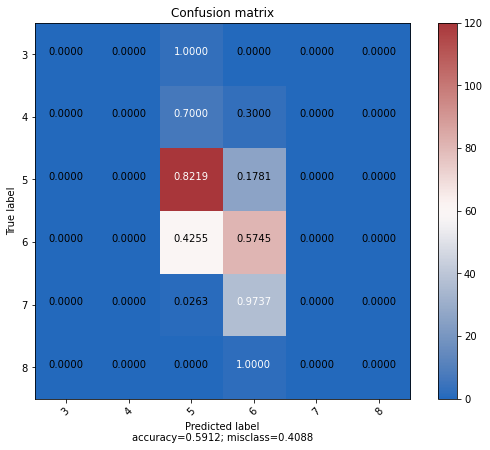

In [22]:
plot_confusion_matrix(cfm, range(3, 9), cmap="vlag")

In [23]:
### code came from https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()